In [1]:
## Load any changes to local modules
%load_ext autoreload
%autoreload 2

import os
import sys

pwd = %pwd
project_dir = '{0}/../../../'.format(pwd)
module_path = os.path.abspath(os.path.join(project_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
%matplotlib inline
from IPython.display import display

import sqlalchemy
import sqlite3
import struct

from nbcpact import AnalyzeQuantCompare,Peptide,PeptideGroup,UcbreUtils,PeptidesFromPeptideListBuilder
from nbcpact.protdisc import PDReader

In [3]:
file_path = '/usca/asperapoc/NB-CPACT/NB-CPACT-NIBR/NIBR_loaded_UCB_EN80/Analysis/PD2.1/KEA_isoTOP_DN_All.pdResult'
pdReader = PDReader(pd_result_file=file_path, include_non_quant=False)
pd_2_1_mascot_target_peptidesDF = pdReader.get_target_peptides(include_additional_data=True)



In [5]:
pd_2_1_mascot_target_peptidesDF.columns

Index(['PeptideGroupID', 'Checked', 'Confidence', 'ExcludedBy', 'Sequence',
       'Modifications_all_positions', 'Modifications_best_positions',
       'QvalityPEP', 'Qvalityqvalue', 'ParentProteinGroupCount',
       'ParentProteinCount', 'PsmCount', 'MasterProteinAccessions',
       'MissedCleavages', 'TheoreticalMass', 'QuanInfo', 'FILES',
       'ABUNDANCE_RATIOS', 'ABUNDANCE_LOG2_RATIO', 'ABUNDANCES',
       'ISOTOP_LIGHT_1', 'ISOTOP_HEAVY_2', 'QUANTILE_NORM_ABUNDANCE_RATIO',
       'QUANTILE_NORM_ABUNDANCE_LOG2_RATIO', 'MOD_LOCS', 'GLOBAL_MOD_LOCS',
       'ISOTOP_MOD_LOCS', 'GLOBAL_ISOTOP_LOCS'],
      dtype='object')

In [4]:
## Get some PD Stats
print('All data PercolatorqValueMascot <= {:.2f}'.format(pd_2_1_mascot_target_peptidesDF.PercolatorqValueMascot.max()))

cols = ['Sequence', 'ExcludedBy', 'QuanInfo',  'AbundanceRatios', 'Modifications_best_positions']

df = pd_2_1_mascot_target_peptidesDF
num_peps = len(set(df.Sequence))
num_iso_top_peps = len(set(df[df.Modifications_best_positions.str.contains('isoTOP')].Sequence))
num_peps_wit_ratios = len(set(df[~df.AbundanceRatios.isnull()].Sequence))

selector = df.Modifications_best_positions.str.contains('isoTOP') & ~df.AbundanceRatios.isnull()
num_isotop_peps_with_ratios = len(set(df[selector].Sequence))

msg = 'Tot Seq {}, isoTOP Seq {} ({:.2f}), seqs with quant ratio {} ({:.2f}), isoTOP seqs with ratios {} ({:.2f} isoTOP with Ratio / isoTOP)'.format(
        num_peps, num_iso_top_peps, 
        (num_iso_top_peps/num_peps), 
        num_peps_wit_ratios, 
        (num_peps_wit_ratios/num_peps), 
        num_isotop_peps_with_ratios,
        (num_isotop_peps_with_ratios/num_iso_top_peps)
        )
display(msg)

selector = df.Modifications_best_positions.str.contains('isoTOP') & df.AbundanceRatios.isnull()
tmpDF = df[selector]
display('Peptides with no abundance ratios')
#display(tmpDF[cols].head())


display(tmpDF.groupby(['ExcludedBy']).agg({"Sequence": lambda x: x.nunique()}))
display(tmpDF.groupby(['QuanInfo']).agg({"Sequence": lambda x: x.nunique()}))


selector = df.Modifications_best_positions.str.contains('isoTOP') & ~df.AbundanceRatios.isnull()
tmpDF = df[selector]
display('Peptides with abundance ratios')
#display(tmpDF[cols].head())

display(tmpDF.groupby(['ExcludedBy']).agg({"Sequence": lambda x: x.nunique()}))
display(tmpDF.groupby(['QuanInfo']).agg({"Sequence": lambda x: x.nunique()}))

# No do FDR 1%
display('PercolatorqValueMascot <= 0.01 ')
df = pd_2_1_mascot_target_peptidesDF[pd_2_1_mascot_target_peptidesDF.PercolatorqValueMascot <= 0.01]
num_peps = len(set(df.Sequence))
num_iso_top_peps = len(set(df[df.Modifications_best_positions.str.contains('isoTOP')].Sequence))
num_peps_wit_ratios = len(set(df[~df.AbundanceRatios.isnull()].Sequence))

selector = df.Modifications_best_positions.str.contains('isoTOP') & ~df.AbundanceRatios.isnull()
num_isotop_peps_with_ratios = len(set(df[selector].Sequence))

msg = 'Tot Seq {}, isoTOP Seq {} ({:.2f}), seqs with quant ratio {} ({:.2f}), isoTOP seqs with ratios {} ({:.2f} isoTOP with Ratio / isoTOP)'.format(
        num_peps, num_iso_top_peps, 
        (num_iso_top_peps/num_peps), 
        num_peps_wit_ratios, 
        (num_peps_wit_ratios/num_peps), 
        num_isotop_peps_with_ratios,
        (num_isotop_peps_with_ratios/num_iso_top_peps)
        )
display(msg)

display('Peptides with no abundance ratios')
selector = df.Modifications_best_positions.str.contains('isoTOP') & df.AbundanceRatios.isnull()
tmpDF = df[selector]

#display(tmpDF[cols].head())

display(tmpDF.groupby(['ExcludedBy']).agg({"Sequence": lambda x: x.nunique()}))
display(tmpDF.groupby(['QuanInfo']).agg({"Sequence": lambda x: x.nunique()}))

display('Peptides with abundance ratios')
selector = df.Modifications_best_positions.str.contains('isoTOP') & ~df.AbundanceRatios.isnull()
tmpDF = df[selector]
#display(tmpDF[cols].head())

display(tmpDF.groupby(['ExcludedBy']).agg({"Sequence": lambda x: x.nunique()}))
display(tmpDF.groupby(['QuanInfo']).agg({"Sequence": lambda x: x.nunique()}))

AttributeError: 'DataFrame' object has no attribute 'PercolatorqValueMascot'

With Reverse: num records 4353, num sequences 2539
num records 3838, num sequences 2046


,sequence,PTM_INDEX,P-VALUE,Q-VALUE,UNIQUE_1,AREA_RATIO_ALL_1,AREA_MEDIAN_RATIO_1,AREA_RATIO_STDEV_1,AREA_RATIO_COUNT_1,LR_RATIO_1,...,XCORR_1,DEL_CN_1,LIGHT_AREA_1,HEAVY_AREA_1,PROFILE_SCORE_1,SCAN_1,ENRICHMENT_1,protein,ip2_sequence,RatioRank


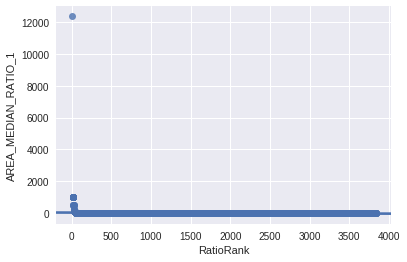

In [6]:
ip2_peptide_listDF = pd.read_csv("../../../datanocommit/peptideList.csv")
ip2_peptide_listDF['ip2_sequence'] = ip2_peptide_listDF.sequence

ip2_peptide_listDF['sequence'] = ip2_peptide_listDF.sequence.str.replace('\(\d+\.\d+\)','')

print('With Reverse: num records {0}, num sequences {1}'.format(ip2_peptide_listDF.index.size, len(set(ip2_peptide_listDF.sequence))))
ip2_peptide_listDF = ip2_peptide_listDF[~ip2_peptide_listDF['protein'].str.contains('Reverse')]
print('num records {0}, num sequences {1}'.format(ip2_peptide_listDF.index.size, len(set(ip2_peptide_listDF.sequence))))

ip2_peptide_listDF['RatioRank'] = ip2_peptide_listDF.AREA_MEDIAN_RATIO_1.rank(ascending=False)

ax = sns.regplot(x="RatioRank", y="AREA_MEDIAN_RATIO_1", data=ip2_peptide_listDF)
plt.figure()

ip2_peptide_listDF[~ip2_peptide_listDF.AREA_MEDIAN_RATIO_1.isnull()].index.size

pattern =  re.compile(r'.*C\(4\d{2}\.\d{5}\).*')

ip2_peptide_listDF[~ip2_peptide_listDF.ip2_sequence.str.match(pattern)]

In [8]:
## Find overlap
pd_2_1_mascot_target_peptidesDF['in_ip2'] = pd_2_1_mascot_target_peptidesDF.Sequence.isin(ip2_peptide_listDF['sequence'])
#pd_2_1_mascot_target_peptidesDF['Neglog10_PercolatorqValueMascot'] = pd_2_1_mascot_target_peptidesDF.PercolatorqValueMascot.apply(lambda x : -np.log10(x+0.0000001))

ip2_peptide_listDF['in_pd'] = ip2_peptide_listDF.sequence.isin(pd_2_1_mascot_target_peptidesDF.Sequence)

In [12]:
ip2DF = ip2_peptide_listDF
pdDF = pd_2_1_mascot_target_peptidesDF

ip2_peps = set(ip2DF.sequence)
pd_peps = set(pdDF.Sequence)
pd_peps_with_ratios = set(pdDF[~pdDF.ABUNDANCE_RATIOS.isnull()].Sequence)

intersection = ip2_peps & pd_peps
msg = 'Num IP2 Peps {}, num PD Peps {}, num common peps {}, ratio IP2 {:.2f}'.format(
                                                                                 len(ip2_peps), 
                                                                                 len(pd_peps), 
                                                                                 len(intersection),
                                                                                 len(intersection)/len(ip2_peps))
print(msg)

#sns.violinplot(x="in_ip2", y="Neglog10_PercolatorqValueMascot", data=pdDF)
#plt.title(msg)
#plt.figure()

intersection = ip2_peps & pd_peps_with_ratios
msg = 'Num IP2 Peps {}, num PD Peps with ratios {}, num common peps {}, ratio IP2 {:.2f}'.format(
                                                                                 len(ip2_peps), 
                                                                                 len(pd_peps_with_ratios), 
                                                                                 len(intersection),
                                                                                 len(intersection)/len(ip2_peps))
print(msg)

#sns.violinplot(x="in_ip2", y="Neglog10_PercolatorqValueMascot", data=pdDF[~pdDF.AbundanceRatios.isnull()])
#plt.title(msg)
#plt.figure()

Num IP2 Peps 2046, num PD Peps 3207, num common peps 877, ratio IP2 0.43
Num IP2 Peps 2046, num PD Peps with ratios 3207, num common peps 877, ratio IP2 0.43


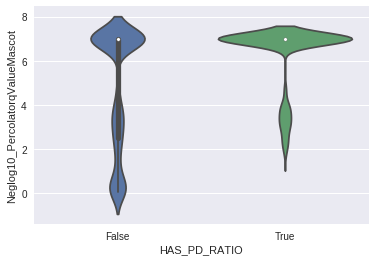

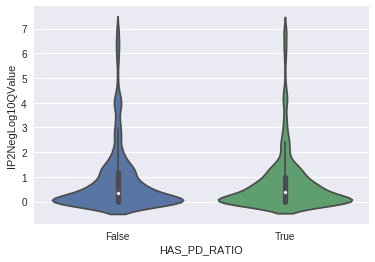

In [252]:
df = pd.merge(ip2_peptide_listDF, pd_2_1_mascot_target_peptidesDF, left_on='sequence', right_on='Sequence', suffixes=['_ip2', '_pd'])


df['HAS_PD_RATIO'] = ~df.AbundanceRatios.isnull()

df['IP2NegLog10QValue'] = df['Q-VALUE'].apply(lambda x : -np.log10(x+0.0000001))



sns.violinplot(y='Neglog10_PercolatorqValueMascot', x='HAS_PD_RATIO', data=df)
plt.figure()

sns.violinplot(y='IP2NegLog10QValue', x='HAS_PD_RATIO', data=df)
plt.figure()

In [249]:
df[~df.HAS_PD_RATIO].sort('PercolatorqValueMascot')[['Sequence', 'Q-VALUE', 'PercolatorqValueMascot']]


/home/jonesmic/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Sequence,Q-VALUE,PercolatorqValueMascot
4340,LNLSCIHSPVVNELMR,0.048549,0.0000
4700,ECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDK,0.000789,0.0000
4701,ECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDK,0.000789,0.0000
4702,ECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDK,0.000789,0.0000
4706,ECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDK,0.000789,0.0000
4707,ECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDK,0.000789,0.0000
4708,ECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDK,0.000789,0.0000
4709,ECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDK,0.000789,0.0000
4710,ECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDK,0.043584,0.0000
4712,ECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDK,0.043584,0.0000


In [379]:
ip2_peptide_listDF[~ip2_peptide_listDF.sequence.str.match(r'\w+[RK]')]

,sequence,PTM_INDEX,P-VALUE,Q-VALUE,UNIQUE_1,AREA_RATIO_ALL_1,AREA_MEDIAN_RATIO_1,AREA_RATIO_STDEV_1,AREA_RATIO_COUNT_1,LR_RATIO_1,...,XCORR_1,DEL_CN_1,LIGHT_AREA_1,HEAVY_AREA_1,PROFILE_SCORE_1,SCAN_1,ENRICHMENT_1,protein,ip2_sequence,RatioRank
32,APVTGGSPEDLPDIQTALSIDYQDVPDTLTLCVAVTCPLMPMNVLCA,"C88,C102 ;X ;X ;",1.000000,1.000000,"U,;X;X;","1.26566,;X;X;",1.265660,NaN,1,"0.52549,;X;X;",...,"2.0215,;X;X;","0.36731,;X;X;","3558397.0,;X;X;","2811487.0,;X;X;","0.57176,;X;X;","38813,;X;X;","0.0,;X;X;",A0A0D9SFZ8 Serine protease inhibitor Kazal-typ...,APVTGGSPEDLPDIQTALSIDYQDVPDTLTLC(470.29977)VAV...,1814.0
131,LECNGVISAHCNLCLPAICVIGSADGTT,"C35,C43 ;X ;X ;",1.000000,1.000000,"U,;X;X;","1.11258,;X;X;",1.112580,NaN,1,"1.26954,;X;X;",...,"2.5417,;X;X;","0.57328,;X;X;","1727304.0,;X;X;","1552527.0,;X;X;","0.01424,;X;X;","37399,;X;X;","0.0,;X;X;","F8VZR4 RNA-binding motif, single-stranded-inte...",LEC(470.29977)NGVISAHC(464.28596)NLCLPAICVIGSA...,2295.0
306,KLFAPQQILQCSPAN,C230 C263 ;X ;X ;,1.000000,1.000000,",;X;X;","1.17231,;X;X;",1.172310,NaN,1,"1.04864,;X;X;",...,"2.8908,;X;X;","0.93624,;X;X;","9.8345627E7,;X;X;","8.3890598E7,;X;X;","0.96068,;X;X;","18839,;X;X;","0.0,;X;X;","P04183 Thymidine kinase, cytosolic OS=Homo sap...",KLFAPQQILQC(464.28596)SPAN,2073.0
307,KLFAPQQILQCSPAN,C230 C263 ;C230 C263 ;C230 ;,0.011065,0.089530,",;,;,;","1.17345,;1.51188,;1.7045,;",1.511880,1.209973,3,"1.04265,;1.38177,;0.90163,;",...,"3.5832,;2.9407,;3.3004,;","0.93315,;0.87815,;0.51693,;","9.7012045E7,;1.38700062E8,;6.0805558E7,;","8.267263E7,;9.1739938E7,;3.5673614E7,;","0.96269,;0.90761,;0.80484,;","18935,;20534,;19629,;","0.0,;0.0,;0.0,;","P04183 Thymidine kinase, cytosolic OS=Homo sap...",KLFAPQQILQC(470.29977)SPAN,1238.0
428,YGQCWVFAAVAC,C285 ;X ;X ;,1.000000,1.000000,",;X;X;","0.41674,;X;X;",0.416740,NaN,1,"0.08759,;X;X;",...,"3.2316,;X;X;","0.00868,;X;X;","9396515.0,;X;X;","2.2547783E7,;X;X;","0.3636,;X;X;","31670,;X;X;","0.0,;X;X;",P21980 Protein-glutamine gamma-glutamyltransfe...,YGQCWVFAAVAC(470.29977),3548.0
431,YGQCWVFAAVAC,C285 ;X ;X ;,1.000000,1.000000,",;X;X;","0.04353,;X;X;",0.043530,NaN,1,"0.0,;X;X;",...,"3.2346,;X;X;","0.0,;X;X;","2685494.0,;X;X;","6.1699653E7,;X;X;","0.66521,;X;X;","37474,;X;X;","0.0,;X;X;",P21980 Protein-glutamine gamma-glutamyltransfe...,YGQCWVFAAVAC(470.29977),3798.0
617,LGGSLIVAFEGCPV,C146 C163 ;C146 C163 C146 C163 ;X ;,0.006725,0.063918,",;,,;X;","0.9026,;0.84259,1.10139,;X;",0.902600,1.149241,3,"0.38689,;0.0,0.0,;X;",...,"2.6176,;2.5192,3.5636,;X;","0.13735,;0.0,0.0,;X;","1.2878936E7,;5231082.0,1.4550008E7,;X;","1.4268659E7,;6208344.0,1.3210565E7,;X;","0.68443,;0.0,0.64045,;X;","17811,;4516,21940,;X;","0.0,;0.0,0.0,;X;",P60981-2 Isoform 2 of Destrin OS=Homo sapiens ...,LGGSLIVAFEGC(464.28596)PV,2959.0
762,YAYLNVVGMVGSIDNDFCGTDMTIGTDSA,"C179,M183 C179,M183 ;C179,M183 C179,M183 C179,...",0.005916,0.059688,",,;,,,;,,,;","0.54002,0.29099,;0.22701,0.14649,0.24897,;0.17...",0.199415,2.268012,8,"0.0,0.15208,;0.01598,0.0,0.03425,;0.18085,0.00...",...,"4.698,5.1073,;6.3517,6.0067,6.311,;6.1136,6.24...","0.0,0.25113,;0.01167,0.0,0.00549,;0.38865,0.03...","3.0563748E7,2.9005626E7,;5.0067884E7,3.8942554...","5.6597273E7,9.967772E7,;2.20551288E8,2.6584243...","0.80524,0.5688,;0.91957,0.89736,0.0,;0.81165,0...","37254,44154,;39346,39042,47579,;39063,38054,45...","0.0,0.0,;0.0,0.0,0.0,;0.0,0.0,0.0,;","Q01813 ATP-dependent 6-phosphofructokinase, pl...",YAYLNVVGMVGSIDNDFC(470.29977)GTDM(15.994915)TI...,3684.0
816,QQFTDDQLLVLTDLLVSPCYYA,C984 C1215 C1840 C212 ;X ;X ;,1.000000,1.000000,",;X;X;","3.93318,;X;X;",3.933180,NaN,1,"0.29842,;X;X;",...,"2.2384,;X;X;","0.01525,;X;X;","2079279.0,;X;X;","528651.0,;X;X;","0.29586,;X;X;","38106,;X;X;","0.0,;X;X;",Q14997-3 Isoform 3 of Proteasome activator com...,QQFTDDQLLVLTDLLVSPC(464.28596)YYA,306.0
1453,LTWHSCPEDEAQ,X ;C177 ;X ;,1.000000,1.000000,"X;U,;X;","X;1.19475,;X;",1.194750,NaN,1,"X;1.18711,;X;",...,"X;4.5956,;X;","X;0.98524,;X;","X;6.21896158E8,;X;","X;5.20522396E8,;X;","X;0.9164,;